# 单因子描述性统计

In [4]:
import os
import pandas as pd
import numpy as np

folder_path = r"D:\研究生课件\4.研一下上半\量化交易/result_backtest[0424]/result_backtest[0424]/RESID_正交后残差值因子[0424]"

data_list = []
name_list = []

for folder_name in os.listdir(folder_path):
    # 构建文件夹的完整路径
    folder = os.path.join(folder_path, folder_name)
    
    # 判断是否为文件夹，如果不是则跳过
    if not os.path.isdir(folder):
        continue
    if "FEE" in folder:
        continue
    
    # 构建文件的完整路径
    file_path = os.path.join(folder, "GroupRtns.csv")
    
    # 判断文件是否存在，如果不存在则跳过
    if not os.path.isfile(file_path):
        continue
    
    # 读取文件并保留所需列
    df = pd.read_csv(file_path, index_col=0)
    
    # 重命名列，以文件夹名作为某因子名称
    df = df['$Group_{4}$'] - df['$Group_{0}$']
    df.columns = folder_name.replace("_cut_norm_residsectorbarrar[0424]", "").replace("RESID_","")
    
    # 输出结果
    name_list.append(df.columns)
    data_list.append(df)

In [5]:
# 将所有数据按照 index 进行 merge
merged_df = pd.concat(data_list, axis=1)
merged_df.columns = name_list
# 输出结果
print(merged_df.head())

            ACCPAY_turn  ACCRCV_turn  CAP_turn  CASHdCAP_ave   CA_turn  \
2016-01-04     0.000409     0.000457  0.000737      0.000738  0.000119   
2016-01-05     0.000063     0.000327  0.000785      0.000688  0.000103   
2016-01-06     0.000340     0.000100  0.001102      0.000726  0.000374   
2016-01-07    -0.000218    -0.000109  0.000508      0.000152 -0.000038   
2016-01-08    -0.000026    -0.000086  0.000844      0.000103  0.000041   

            DVD_ratio    EBIT_G  EBIT_ratio_TTM   FA_turn  FIN_ratio  ...  \
2016-01-04  -0.000262  0.000749        0.000324  0.000465  -0.000264  ...   
2016-01-05  -0.000167  0.000406        0.000522  0.000604  -0.000406  ...   
2016-01-06  -0.000601 -0.000042       -0.000053  0.000811   0.000140  ...   
2016-01-07  -0.000951  0.000290        0.000126  0.000518   0.000170  ...   
2016-01-08  -0.000796  0.000251        0.000475  0.000270   0.000202  ...   

                  PB        PE    PE_TTM    PS_TTM   ROE_TTM  ROIC_TTM  \
2016-01-04  0.0003

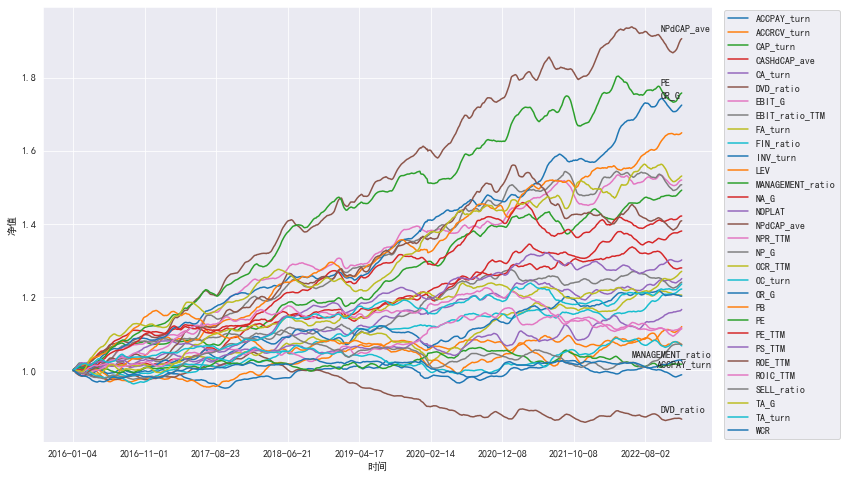

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("darkgrid")
import matplotlib.ticker as ticker

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(6, 3))
plt.rc("savefig", dpi=90)
plt.rc("font", family="SimHei")
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# plt.rc("font", size=12)
plt.rc("font", size=10)
plt.rcParams["date.autoformatter.hour"] = "%H:%M:%S"

# 计算每个因子收益率序列的 cumulative sum
cumsum_df = (merged_df+1).cumprod()

# 标注最高和最低的三个
bot_three = cumsum_df.columns[cumsum_df.iloc[-1,:].argsort().values[:3]] # 最低三个
top_three = cumsum_df.columns[cumsum_df.iloc[-1,:].argsort().values[-3:]] # 最高三个

# 绘制折线图
fig, ax = plt.subplots(figsize=(12, 8))
for col in cumsum_df.columns:
    ax.plot(cumsum_df[col], label=col)
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=200))
ax.set_xlabel('时间')
ax.set_ylabel('净值')

# 最高的三个
plt.text(cumsum_df.index[-60],cumsum_df.iloc[-1,cumsum_df.iloc[-1,:].argsort().values[0]]+0.02,bot_three[0])
plt.text(cumsum_df.index[-70],cumsum_df.iloc[-1,cumsum_df.iloc[-1,:].argsort().values[1]]+0.02,bot_three[1])
plt.text(cumsum_df.index[-140],cumsum_df.iloc[-1,cumsum_df.iloc[-1,:].argsort().values[2]]+0.02,bot_three[2])

plt.text(cumsum_df.index[-60],cumsum_df.iloc[-1,cumsum_df.iloc[-1,:].argsort().values[-3]]+0.02,top_three[0])
plt.text(cumsum_df.index[-60],cumsum_df.iloc[-1,cumsum_df.iloc[-1,:].argsort().values[-2]]+0.02,top_three[1])
plt.text(cumsum_df.index[-60],cumsum_df.iloc[-1,cumsum_df.iloc[-1,:].argsort().values[-1]]+0.02,top_three[2])

plt.savefig('single_factor.jpg',bbox_inches = 'tight')
plt.show()

In [23]:
merged_df.to_csv('single_factor.csv')

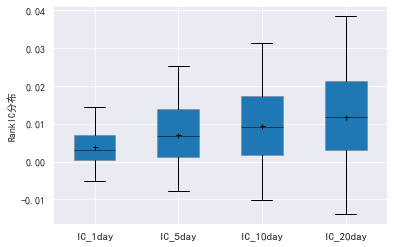

In [96]:
%matplotlib inline
plt.rc('axes', unicode_minus=False)
plt.boxplot(dat.iloc[0,2:], positions=[1],patch_artist=True,showmeans=True,widths = 0.5,
            boxprops={"facecolor": "C0",
                      "edgecolor": "grey",
                      "linewidth": 0.5},
            medianprops={"color": "k", "linewidth": 0.5},
            meanprops={'marker':'+',
                       'markerfacecolor':'k',
                       'markeredgecolor':'k',
                       'markersize':5})
plt.boxplot(dat.iloc[13,2:], positions=[2],patch_artist=True,showmeans=True,widths = 0.5,
            boxprops={"facecolor": "C0",
                      "edgecolor": "grey",
                      "linewidth": 0.5},
            medianprops={"color": "k", "linewidth": 0.5},
            meanprops={'marker':'+',
                       'markerfacecolor':'k',
                       'markeredgecolor':'k',
                       'markersize':5})
plt.boxplot(dat.iloc[26,2:], positions=[3],patch_artist=True,showmeans=True,widths = 0.5,
            boxprops={"facecolor": "C0",
                      "edgecolor": "grey",
                      "linewidth": 0.5},
            medianprops={"color": "k", "linewidth": 0.5},
            meanprops={'marker':'+',
                       'markerfacecolor':'k',
                       'markeredgecolor':'k',
                       'markersize':5})
plt.boxplot(dat.iloc[39,2:], positions=[4],patch_artist=True,showmeans=True,widths = 0.5,
            boxprops={"facecolor": "C0",
                      "edgecolor": "grey",
                      "linewidth": 0.5},
            medianprops={"color": "k", "linewidth": 0.5},
            meanprops={'marker':'+',
                       'markerfacecolor':'k',
                       'markeredgecolor':'k',
                       'markersize':5})
plt.xticks([1,2,3,4],['IC_1day','IC_5day','IC_10day','IC_20day'],fontsize=11)
plt.ylabel('RankIC分布')
plt.savefig('RankIC.jpg')

# 组合因子绘图

In [1]:
import os
import pandas as pd
import numpy as np

folder_path = r"D:\研究生课件\4.研一下上半\量化交易\归档\COMB1D_组合因子[0424]"

data_list = []
name_list = []

for folder_name in os.listdir(folder_path):
    # 构建文件夹的完整路径
    folder = os.path.join(folder_path, folder_name)
    
    # 判断是否为文件夹，如果不是则跳过
    if not os.path.isdir(folder):
        continue
    
    # 构建文件的完整路径
    file_path = os.path.join(folder, "PanelLongShort.csv")
    
    # 判断文件是否存在，如果不存在则跳过
    if not os.path.isfile(file_path):
        continue
    
    # 读取文件并保留所需列
    df = pd.read_csv(file_path, index_col=0)
    
    # 重命名列，以文件夹名作为某因子名称
    df = df['Wealth_wc(cumprod)']
    df.columns = folder_name.replace("[0424]","")
    
    # 输出结果
    name_list.append(df.columns)
    data_list.append(df)

In [2]:
# 将所有数据按照 index 进行 merge
merged_df = pd.concat(data_list, axis=1)
merged_df.columns = name_list
# 输出结果
print(merged_df.head())

             COMB1D_Average  COMB1D_HistoryFactorReturn  COMB1D_HistoryIC  \
tradingdate                                                                 
2016-01-04         1.003297                    0.996917          1.005549   
2016-01-05         1.002413                    0.998908          1.002128   
2016-01-06         0.997119                    0.991854          1.007613   
2016-01-07         0.999044                    0.995272          1.006664   
2016-01-08         0.997904                    0.991942          1.011732   

             COMB1D_MaxICIR  COMB1D_MaxIC  COMB1D_PCA  
tradingdate                                            
2016-01-04         1.000369      1.006234    1.006361  
2016-01-05         0.996390      1.000461    1.007495  
2016-01-06         1.005394      1.000377    1.002791  
2016-01-07         0.997414      0.997535    1.009604  
2016-01-08         0.996938      0.997542    1.008304  


In [3]:
data_list = []
name_list = []

folder_path = r"D:\研究生课件\4.研一下上半\量化交易\归档\ORIG5D_原始值+Barra组合[0424]"
for folder_name in os.listdir(folder_path):
    # 构建文件夹的完整路径
    folder = os.path.join(folder_path, folder_name)
    
    # 判断是否为文件夹，如果不是则跳过
    if not os.path.isdir(folder):
        continue
    
    # 构建文件的完整路径
    file_path = os.path.join(folder, "PanelLongShort.csv")
    
    # 判断文件是否存在，如果不存在则跳过
    if not os.path.isfile(file_path):
        continue
    
    # 读取文件并保留所需列
    df = pd.read_csv(file_path, index_col=0)
    
    # 重命名列，以文件夹名作为某因子名称
    df = df['Wealth_wc(cumprod)']
    df.columns = folder_name.replace("[0424]","")
    
    # 输出结果
    name_list.append(df.columns)
    data_list.append(df)
    
    # 将所有数据按照 index 进行 merge
merged_df_1 = pd.concat(data_list, axis=1)
merged_df_1.columns = name_list
# 输出结果
print(merged_df_1.head())

             ORIG5D_Average  ORIG5D_HistoryFactorReturn  ORIG5D_HistoryIC  \
tradingdate                                                                 
2016-01-04         1.001673                    0.993881          0.997876   
2016-01-05         0.999722                    0.992519          0.996319   
2016-01-06         0.984365                    0.996271          0.999335   
2016-01-07         0.995001                    0.994775          0.990318   
2016-01-08         0.974536                    0.984119          0.996138   

             ORIG5D_MaxICIR  ORIG5D_MaxIC  ORIG5D_PCA  
tradingdate                                            
2016-01-04         1.007018      0.991011    1.001833  
2016-01-05         1.000261      0.993541    0.998280  
2016-01-06         1.000355      0.985343    0.983000  
2016-01-07         0.996931      0.986891    0.989184  
2016-01-08         0.995736      0.979486    0.975720  


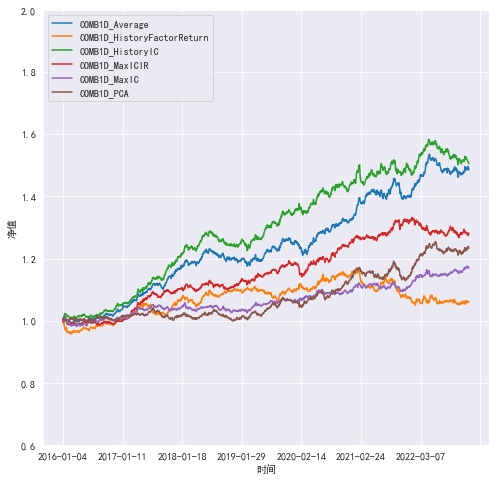

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("darkgrid")
import matplotlib.ticker as ticker

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(6, 3))
plt.rc("savefig", dpi=90)
plt.rc("font", family="SimHei")
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# plt.rc("font", size=12)
plt.rc("font", size=10)
plt.rcParams["date.autoformatter.hour"] = "%H:%M:%S"

# 计算每个因子收益率序列的 cumulative sum
cumsum_df = merged_df

# 绘制折线图
fig, ax = plt.subplots(figsize=(8, 8))
for col in cumsum_df.columns:
    ax.plot(cumsum_df[col], label=col)
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=250))
plt.ylim((0.6,2.0))
ax.set_xlabel('时间')
ax.set_ylabel('净值')

plt.savefig('COMB.jpg',bbox_inches = 'tight')
plt.show()

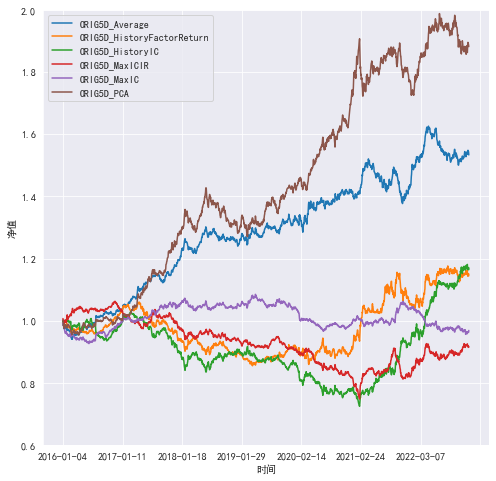

In [5]:
# 计算每个因子收益率序列的 cumulative sum
cumsum_df_1 = merged_df_1
# 绘制折线图
fig, ax = plt.subplots(figsize=(8, 8))
for col in cumsum_df_1.columns:
    ax.plot(cumsum_df_1[col], label=col)
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=250))
plt.ylim((0.6,2.0))
ax.set_xlabel('时间')
ax.set_ylabel('净值')
plt.savefig('ORIG.jpg',bbox_inches = 'tight')

plt.show()